### **Iris Dataset classification using SVM, MLP and Random Forest classifier**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

In [ ]:
X = df.iloc[:][:]
y = iris["target"]
dict_svm = {}
dict_mlp = {}
dict_rfr = {}
RocAucSvm = {}
RocAucMlp = {}
RocAucRfr = {}
print(X, y)

### **Used for ploting confusion matrix**

In [ ]:
def plot(y_test, y_pred):
  from sklearn.metrics import confusion_matrix  
  import seaborn as sns
  
  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(3,3)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels = iris.target_names, yticklabels=iris.target_names)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  print("**********************************************")


In [ ]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report
  plot(y_test, y_pred)
  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### **SVM CLASSIFIER**

In [ ]:
def SVMClassifier(split, kernalValue = 'rbf', degreeValue = 3, gammaValue = 'scale', maxIter = -1):
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = split, random_state=44)
  classifier = SVC(kernel = kernalValue, degree = degreeValue, gamma = gammaValue, max_iter = maxIter)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if str(split) in dict_svm:
    if dict_svm[str(split)][0] < accuracy:
      dict_svm[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_svm[str(split)][0]:
      RocAucSvm['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_svm[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucSvm['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)


In [ ]:
#Train - Test split 70-30
SVMClassifier(0.3)
SVMClassifier(0.3, 'linear')
SVMClassifier(0.3, 'poly')
SVMClassifier(0.3, 'sigmoid', 3, 0.022)

In [ ]:
#Train - Test split 60-40
SVMClassifier(0.4, 'rbf', 3, 'auto')
SVMClassifier(0.4, 'linear')
SVMClassifier(0.4, 'poly')
SVMClassifier(0.4, 'sigmoid', 3, 0.023 ) #wrost performance

In [ ]:
#Train - Test split 50-50
SVMClassifier(0.5, 'rbf', 3, 'auto')
SVMClassifier(0.5, 'linear')
SVMClassifier(0.5, 'poly')
SVMClassifier(0.5, 'sigmoid', 3, 0.022) #wrost performance

In [ ]:
#Train - Test split 40-60
SVMClassifier(0.6, 'rbf', 3, 'auto')
SVMClassifier(0.6, 'linear')
SVMClassifier(0.6, 'poly')
SVMClassifier(0.6, 'sigmoid', 3, 0.015 ) #wrost performance

In [ ]:
#Train - Test split 30-70
SVMClassifier(0.7, 'rbf', 3, 'auto')
SVMClassifier(0.7, 'linear')
SVMClassifier(0.7, 'poly')
SVMClassifier(0.7, 'sigmoid', 3, 2 ) #wrost performance

### **split vs accuracy graph**

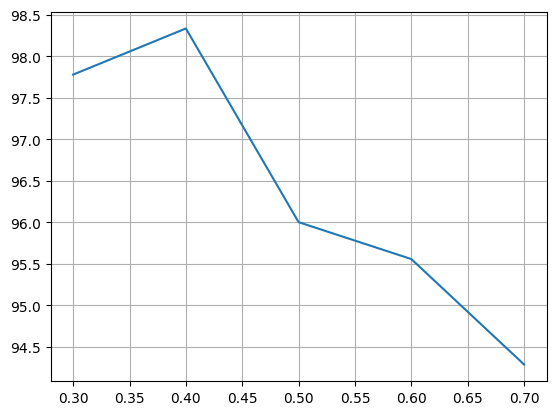

In [37]:
keys = dict_svm.keys()
y_points = []
for key in keys:
  y_points.append(dict_svm[key][0]*100)
x_points = [float(key) for key in dict_svm.keys()]

plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **MLP Classifier**

In [ ]:
def MLPClassifier(split, hiddenLayerSize = [100, ], activationValue = 'relu', solverValue = 'adam'):
  from sklearn.model_selection import train_test_split
  from sklearn.neural_network import MLPClassifier
  from sklearn.metrics import accuracy_score
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  classifier = MLPClassifier(hidden_layer_sizes = hiddenLayerSize, activation = activationValue, solver = solverValue, random_state = 1)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if str(split) in dict_mlp:
    if dict_mlp[str(split)][0] < accuracy:
      dict_mlp[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_mlp[str(split)][0]:
      RocAucMlp['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_mlp[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucMlp['max'] = {'y_test': y_test, 'y_pred': y_pred}
  
  reports(y_test, y_pred)

In [ ]:
#Train - Test split 70-30
MLPClassifier(0.3, [30, ])

In [ ]:
#Train - Test split 60-40
MLPClassifier(0.4, [35, ])

In [ ]:
#Train - Test split 50-50
MLPClassifier(0.5, [35, ])

In [ ]:
#Train - Test split 40-60
MLPClassifier(0.6, [45, 8])

In [ ]:
#Train - Test split 30-70
MLPClassifier(0.7, [50, 10])

### **split vs accuracy graph**

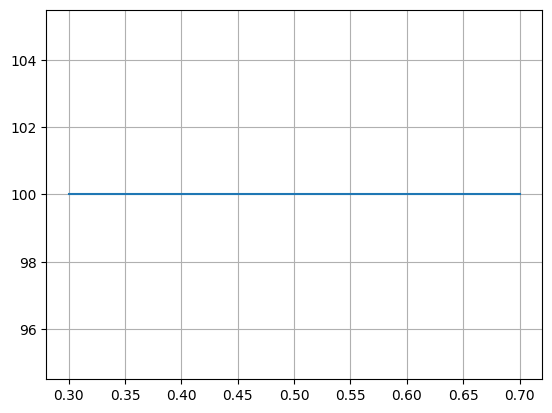

In [36]:
keys = dict_mlp.keys()
y_points = []
for key in keys:
  y_points.append(dict_mlp[key][0]*100)
x_points = [float(key) for key in dict_mlp.keys()]

plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Random Forest Classifier**

In [ ]:
def randomForest(split, estimator = 100, criterionValue = 'gini', ):
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = split, random_state=44)
  classifier = RandomForestClassifier(n_estimators = estimator, criterion = criterionValue)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if str(split) in dict_rfr:
    if dict_rfr[str(split)][0] < accuracy:
      dict_rfr[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_rfr[str(split)][0]:
      RocAucRfr['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_rfr[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucRfr['max'] = {'y_test': y_test, 'y_pred': y_pred}

  reports(y_test, y_pred)


In [ ]:
randomForest(0.3)

In [ ]:
randomForest(0.4)

In [ ]:
randomForest(0.5)

In [ ]:
randomForest(0.6, 100, 'entropy')

In [ ]:
randomForest(0.7, 120)

### **split vs accuracy graph**

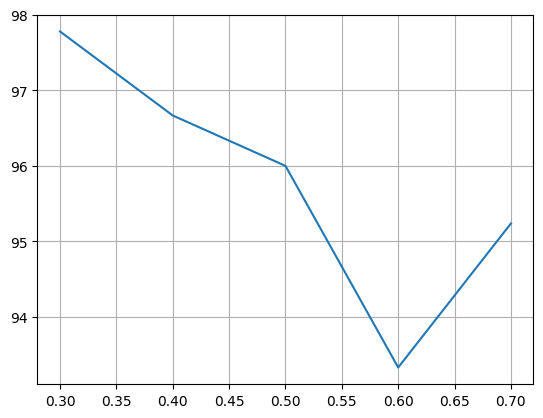

In [35]:
keys = dict_rfr.keys()
y_points = []
for key in keys:
  y_points.append(dict_rfr[key][0]*100)
x_points = [float(key) for key in dict_rfr.keys()]

plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **ROC curve and ROC_AUC score for all the classifier having maximum accuracy when train test split 70-30.**

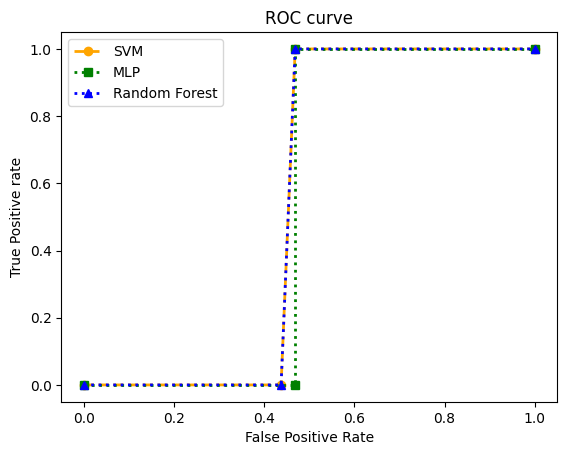

In [34]:
from sklearn import metrics
def auc_roc():
    fpr1, tpr1, _1 = metrics.roc_curve(RocAucSvm['max']['y_test'], RocAucSvm['max']['y_pred'], pos_label=1)
    fpr2, tpr2, _2 = metrics.roc_curve(RocAucMlp['max']['y_test'], RocAucMlp['max']['y_pred'], pos_label=1)
    fpr3, tpr3, _3 = metrics.roc_curve(RocAucRfr['max']['y_test'], RocAucRfr['max']['y_pred'], pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--', linewidth=2, color='orange', marker='o', markersize=6, label='SVM')
    plt.plot(fpr2, tpr2, linestyle='dotted', linewidth=2, color='green', marker='s', markersize=6, label='MLP')
    plt.plot(fpr3, tpr3, linestyle=':', linewidth=2, color='blue', marker='^', markersize=6, label='Random Forest')
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show()
auc_roc()

Confusion Matrix : 


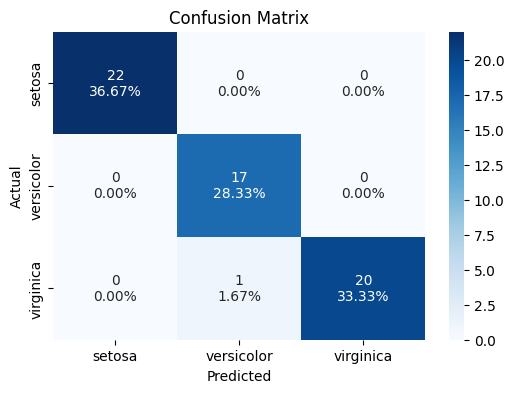

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      1.00      0.97        17
           2       1.00      0.95      0.98        21

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [33]:
#Best result for svm classifier
maxi=0
y_test = []
y_pred = []
for key in dict_svm:
  if maxi < 100*dict_svm[key][0]:
    maxi = 100*dict_svm[key][0]
    y_test = dict_svm[key][1]
    y_pred = dict_svm[key][2]
reports(y_test, y_pred)


Confusion Matrix : 


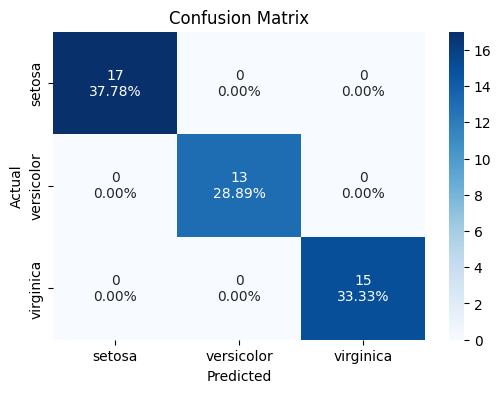

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [32]:
#Best result for mlp classifier
maxi=0
y_test = []
y_pred = []
for key in dict_mlp:
  if maxi < 100*dict_mlp[key][0]:
    maxi = 100*dict_mlp[key][0]
    y_test = dict_mlp[key][1]
    y_pred = dict_mlp[key][2]
reports(y_test, y_pred)


Confusion Matrix : 


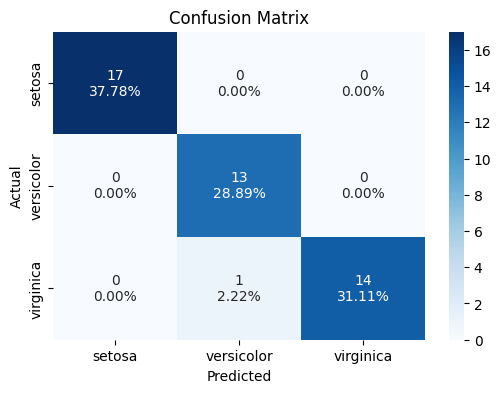

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [31]:
#Best result for random forest classifier
maxi=0
y_test = []
y_pred = []
for key in dict_rfr:
  if maxi < 100*dict_rfr[key][0]:
    maxi = 100*dict_rfr[key][0]
    y_test = dict_rfr[key][1]
    y_pred = dict_rfr[key][2]
reports(y_test, y_pred)
